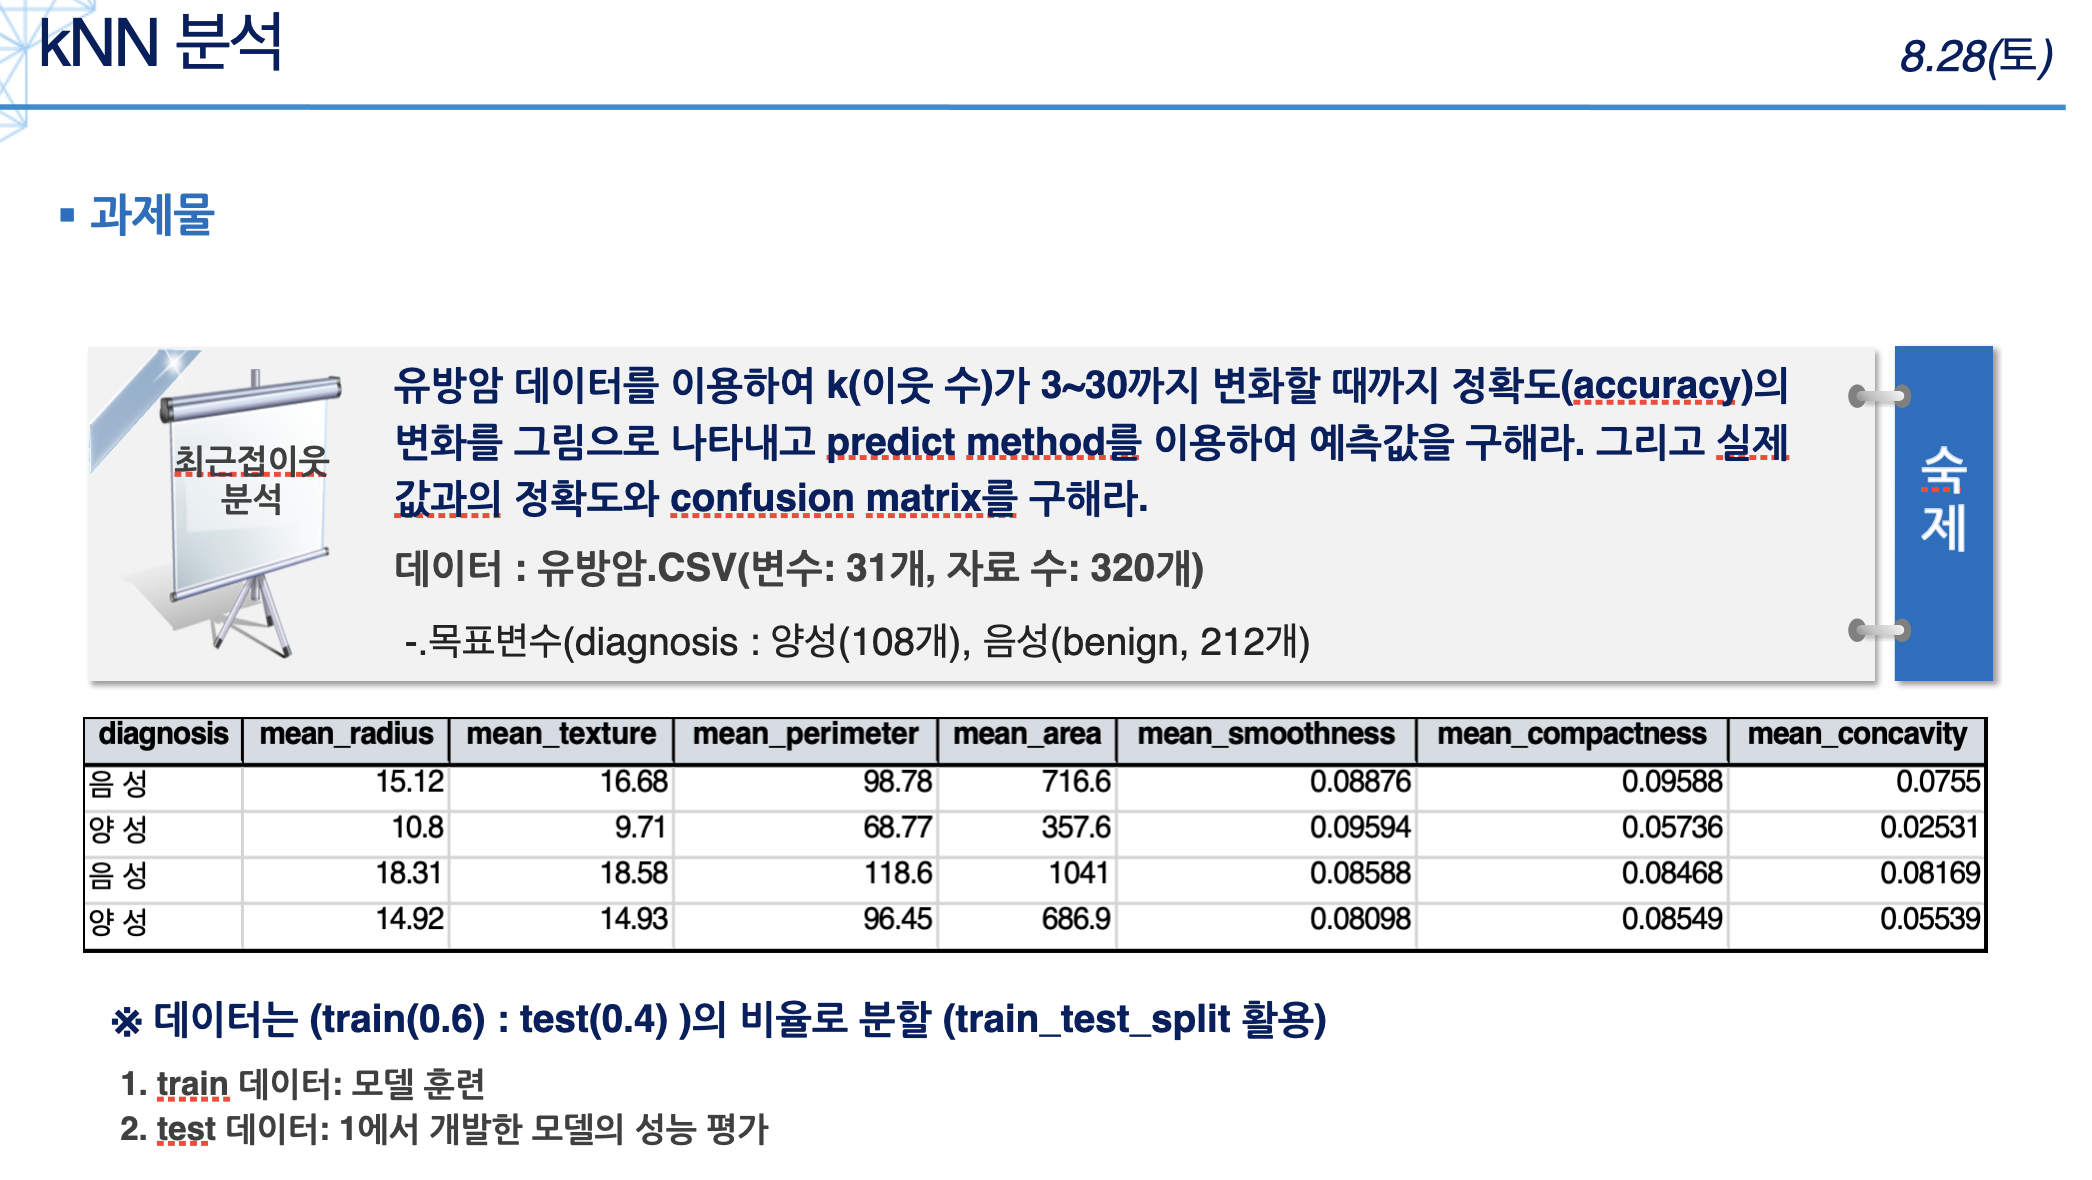

# KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font',  family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
# 데이터 구성 

df_raw=pd.read_csv('../data/유방암.csv',engine="python",encoding="CP949")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw.replace({'diagnosis': '양성'}, 1, inplace=True)
df_raw.replace({'diagnosis': '음성'}, 0, inplace=True)

df_raw_y=df_raw["diagnosis"]
df_raw_x=df_raw.drop("diagnosis",axis=1,inplace=False)

In [4]:
# 데이터 구성하기 - 데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(224, 30)
train data Y size :(224,)
test data X size :(96, 30)
test data Y size :(96,)


# 3. knn모델 생성


## hyper parameter 튜닝 전 모델 정확도
Accuracy on knn_uncustomized training set:0.942

Accuracy on knn_uncustomized test set:0.906


In [5]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)

#train 데이터 정확도
print("Accuracy on knn_uncustomized training set:{:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
#test 데이터 정확도
print("Accuracy on knn_uncustomized test set:{:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on knn_uncustomized training set:0.942
Accuracy on knn_uncustomized test set:0.906


#### default값 확인

In [6]:
knn_uncustomized.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# 4-1. 모델 파라메터 조정: n_neighbors =>6선택

train, test 정확도가 90% 이상으로 높고, 두 값의 차이가 작아지는 지점을 선택

## 4-1-1. n_neighbors(1~16)에 따른 accuracy 변화


In [7]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

para_n_neighbors=[ i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["Neighbors"]=para_n_neighbors
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["TestAccuracy"]=test_accuracy
df_accuracy_hidden.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.865
1,2,0.942,0.906
2,3,0.933,0.885
3,4,0.929,0.896
4,5,0.942,0.906
5,6,0.946,0.927
6,7,0.938,0.917
7,8,0.933,0.917
8,9,0.929,0.917
9,10,0.911,0.896


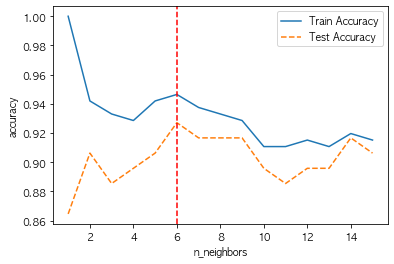

In [8]:
#모델 정확도 그래프 확인
plt.plot(para_n_neighbors,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_n_neighbors,test_accuracy,linestyle="--",label="Test Accuracy")
plt.axvline(x=6, linestyle='--', c='r')
plt.xlabel("n_neighbors");plt.ylabel("accuracy")
plt.legend()

# 4-2. 모델 파라메터 조정: weight =>uniform선택

이유:

가중치 distance일 때 train 데이터의 모델 정확도는 1로 과대적합되어있다.

따라서 uniform을 선택하였다.

In [9]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

para_n_neighbors=[i for i in range(1,11)]*2
para_weights=(["uniform"])*10+(["distance"]*10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_weights=pd.DataFrame()
df_accuracy_weights["Neighbors"]=para_n_neighbors
df_accuracy_weights["Weights"]=para_weights
df_accuracy_weights["TrainAccuracy"]=train_accuracy
df_accuracy_weights["TestAccuracy"]=test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.865
1,2,uniform,0.942,0.906
2,3,uniform,0.933,0.885
3,4,uniform,0.929,0.896
4,5,uniform,0.942,0.906
5,6,uniform,0.946,0.927
6,7,uniform,0.938,0.917
7,8,uniform,0.933,0.917
8,9,uniform,0.929,0.917
9,10,uniform,0.911,0.896


In [10]:
#column name level 0,1->0d으로 변환
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors",columns="Weights",values=["TrainAccuracy","TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.864583  0.864583
2                   1.0  0.941964     0.864583  0.906250
3                   1.0  0.933036     0.885417  0.885417
4                   1.0  0.928571     0.864583  0.895833
5                   1.0  0.941964     0.895833  0.906250
6                   1.0  0.946429     0.895833  0.927083
7                   1.0  0.937500     0.906250  0.916667
8                   1.0  0.933036     0.906250  0.916667
9                   1.0  0.928571     0.916667  0.916667
10                  1.0  0.910714     0.895833  0.895833

In [11]:
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)
print(level0)
print(level1)
df_accuracy_weights_pivot.columns=level0+'_'+level1
df_accuracy_weights_pivot.head()

Index(['TrainAccuracy', 'TrainAccuracy', 'TestAccuracy', 'TestAccuracy'], dtype='object')
Index(['distance', 'uniform', 'distance', 'uniform'], dtype='object', name='Weights')


,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.864583,0.864583
2,1.0,0.941964,0.864583,0.906250
3,1.0,0.933036,0.885417,0.885417
4,1.0,0.928571,0.864583,0.895833
5,1.0,0.941964,0.895833,0.906250


## weights(uniform VS diatance)에 따른 accuracy 변화

가중치 distance일 때 train 데이터의 모델 정확도는 1로 과대적합되어있다.

따라서 uniform을 선택하였다.

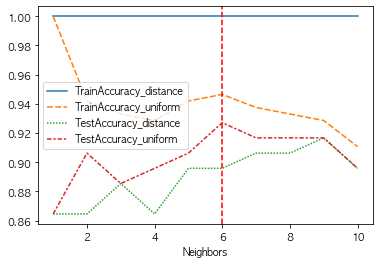

In [13]:
sns.lineplot(data=df_accuracy_weights_pivot)
plt.axvline(x=6, linestyle='--', c='r')

# 4-3. 모델 파라메터 조정: 거리계산방법 =>mantattan선택

이유: train, test 정확도가 높은 경우가 많아서 선택했습니다.

In [14]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

para_n_neighbors=[i for i in range(1,11)]*3
para_metric=["minkowski"]*10+["euclidean"]*10+["manhattan"]*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,metric=v_metric,weights="uniform")
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_metric=pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]=train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.865
1,2,minkowski,0.942,0.906
2,3,minkowski,0.933,0.885
3,4,minkowski,0.929,0.896
4,5,minkowski,0.942,0.906
5,6,minkowski,0.946,0.927
6,7,minkowski,0.938,0.917
7,8,minkowski,0.933,0.917
8,9,minkowski,0.929,0.917
9,10,minkowski,0.911,0.896


## 거리계산방법에 따른 train 정확도
#### mantattan 방법이 정확도가 높은 경우가 많다. 

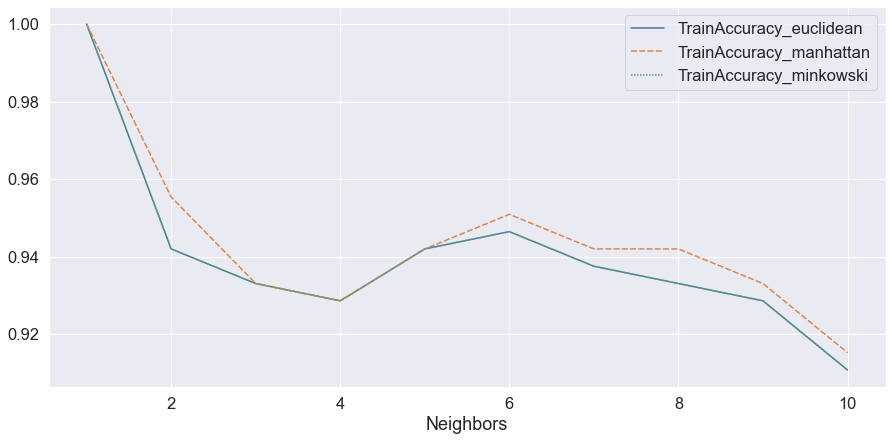

In [26]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors",columns="Metric",values=["TrainAccuracy"])


level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+'_'+level1
plt.figure(figsize=(15,7))
sns.set(font_scale = 1.5) 
sns.lineplot(data=df_accuracy_metric_pivot)
plt.show()
plt.close()

## 거리계산방법에 따른 test 정확도
#### mantattan 방법이 정확도가 높은 경우가 많다. 

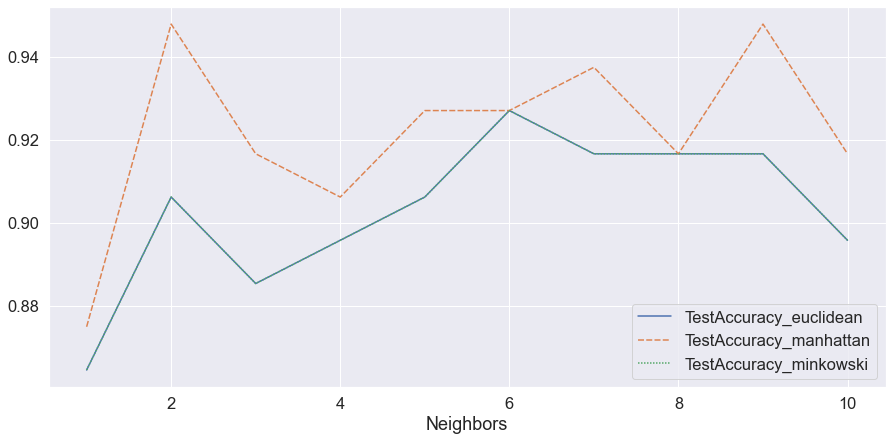

In [28]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors",columns="Metric",values=["TestAccuracy"])


level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+'_'+level1
plt.figure(figsize=(15,7))
sns.set(font_scale = 1.5) 
sns.lineplot(data=df_accuracy_metric_pivot)
plt.show()
plt.close()

# 5.최종 모델: 하이퍼 파라메터 ( Neighbors =6, weights=uniform,거리계산방법=mantattan )

# 최종 모델 평가

## 📌해석: accuracy
### SVM(95.8%)>RandomForest(95.5%)>KNN(92.9%)>DecisionTree(90.6%)
KNN 모델의 test 정확도는 92.9%으로, 

이전 분석에서 진행한 SVM(95.8%), RandomForest(95.5%), DecisionTree(90.6%)

중에서 정확도가 낮은 편이다.

## 📌해석: recall
### SVM(0.909)>RandomForest(0.833)>DecisionTree(0.792)>KNN(0.750)

KNN이 모델 중에서 가장 낮다.


## 📌해석: f1-score
###  SVM(0.937)>DecisionTree(0.906)>RandomForest(0.833)>KNN(0.783)


모델 중에서 가장 낮다. 이유는 KNN모델의 recall이 낮기 때문이다.



## 📌결론: 
### 유방암 데이터 특성
#### 1.유방암 양/음성 진단 데이터에서 양성은 전체 데이터의 24.3%로 불균형 데이터이다.
#### 2.또한 의학 분야이므로 유방암 양성을 음성으로 분류하는 경우 큰 문제가 생긴다.


### 모델 평가지표: accuracy, recall, f1-score
위의 2가지 데이터 특성에 의해서 

유방암 양성을 양성으로(TP) 음성을 음성으로(TN) 분류하는 개수뿐만아니라, 

유방암 양성을 음성으로 진단(FN)하는 개수 또한 중요하다.

따라서 모델 평가지표로 1순위: accuracy, 2순위: recall, 3순위: f1-score를 정하였다.


### ✔️유방암 진단을 위한 모델로 KNN모델은 부적합하다.
총 4개 모델(KNN,SVM,DecisionTree,RandomForest)의 결과를 비교해보면, 

KNN 모델은 accuracy에서 3위, recall에서 4위, f1-score에서 4위로

성능이 좋지 않다는 것을 알 수 있었다.

In [16]:
knn_model=KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="mantattan")
knn_model.fit(df_train_x,df_train_y)
 
y_pred=knn_model.predict(df_test_x)

print("train data accuracy:{:.3f}".format(knn_model.score(df_train_x,df_train_y)))
print("test data accuracy:{:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

train data accuracy:0.929
test data accuracy:0.896
Confusion matrix:
[[68  4]
 [ 6 18]]
              precision    recall  f1-score   support

           0      0.919     0.944     0.932        72
           1      0.818     0.750     0.783        24

    accuracy                          0.896        96
   macro avg      0.869     0.847     0.857        96
weighted avg      0.894     0.896     0.894        96

